In [1]:
#Cluster Analysis Ward's Heirarchaical
#Example Problem Adopted from Machine Learning using Python(Dinesh Kumar)

In [8]:
import os
os.chdir("D:/WORK/Great Lakes/5th Term/PAM/Class 6")

In [9]:
#Import Core Libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
import warnings
warnings.filterwarnings("ignore")

In [10]:
#Read Data File
mydata=pd.read_csv("Beer.csv")
mydata.head()

,name,calories,sodium,alcohol,cost
0,Budweiser,144,15,4.7,0.43
1,Schlitz,151,19,4.9,0.43
2,Lowenbrau,157,15,0.9,0.48
3,Kronenbourg,170,7,5.2,0.73
4,Heineken,152,11,5.0,0.77


In [11]:
#Standardizing Variables
from sklearn.preprocessing import StandardScaler
scaler=StandardScaler()
X=mydata.iloc[:,1:5]
scaled_mydata=scaler.fit_transform(X)
Y=scaled_mydata

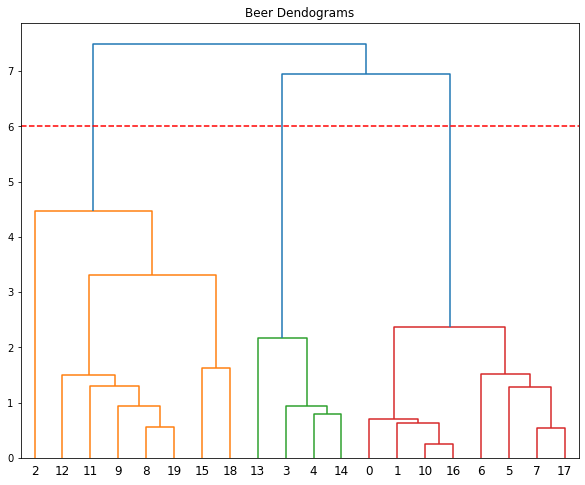

In [12]:
#Ward's Method of Hierarchaical Dendrogram
import scipy.cluster.hierarchy as shc 
plt.figure(figsize=(10,8))
plt.title("Beer Dendograms")
Z=shc.linkage(Y,"ward")
dend = shc.dendrogram(Z,labels=X.index)
plt.axhline(y=6, color='r', linestyle='--')

In [13]:
#Building the Heirarchaical Clustering
from sklearn.cluster import AgglomerativeClustering
clusters=AgglomerativeClustering(3)
clusters.fit(Y)
mydata["clusterid"]=clusters.labels_
mydata

,name,calories,sodium,alcohol,cost,clusterid
0,Budweiser,144,15,4.7,0.43,1
1,Schlitz,151,19,4.9,0.43,1
2,Lowenbrau,157,15,0.9,0.48,0
3,Kronenbourg,170,7,5.2,0.73,2
4,Heineken,152,11,5.0,0.77,2
5,Old_Milwaukee,145,23,4.6,0.28,1
6,Augsberger,175,24,5.5,0.40,1
7,Srohs_Bohemian_Style,149,27,4.7,0.42,1
8,Miller_Lite,99,10,4.3,0.43,0
9,Budweiser_Light,113,8,3.7,0.40,0


In [14]:
mydata[mydata.clusterid==0]

,name,calories,sodium,alcohol,cost,clusterid
2,Lowenbrau,157,15,0.9,0.48,0
8,Miller_Lite,99,10,4.3,0.43,0
9,Budweiser_Light,113,8,3.7,0.40,0
11,Coors_Light,102,15,4.1,0.46,0
12,Michelob_Light,135,11,4.2,0.50,0
15,Pabst_Extra_Light,68,15,2.3,0.38,0
18,Olympia_Goled_Light,72,6,2.9,0.46,0
19,Schlitz_Light,97,7,4.2,0.47,0


In [15]:
mydata[mydata.clusterid==1]

,name,calories,sodium,alcohol,cost,clusterid
0,Budweiser,144,15,4.7,0.43,1
1,Schlitz,151,19,4.9,0.43,1
5,Old_Milwaukee,145,23,4.6,0.28,1
6,Augsberger,175,24,5.5,0.40,1
7,Srohs_Bohemian_Style,149,27,4.7,0.42,1
10,Coors,140,18,4.6,0.44,1
16,Hamms,139,19,4.4,0.43,1
17,Heilemans_Old_Style,144,24,4.9,0.43,1


In [16]:
mydata[mydata.clusterid==2]

,name,calories,sodium,alcohol,cost,clusterid
3,Kronenbourg,170,7,5.2,0.73,2
4,Heineken,152,11,5.0,0.77,2
13,Becks,150,19,4.7,0.76,2
14,Kirin,149,6,5.0,0.79,2


In [17]:
# Profiling the Clusters
table=pd.pivot_table(mydata,values=["calories","sodium","alcohol","cost"],index=["clusterid"])
table

,alcohol,calories,cost,sodium
clusterid,,,,
0,3.3250,105.375,0.4475,10.875
1,4.7875,148.375,0.4075,21.125
2,4.9750,155.250,0.7625,10.750
